# BMW(The road Shark)-Sales report

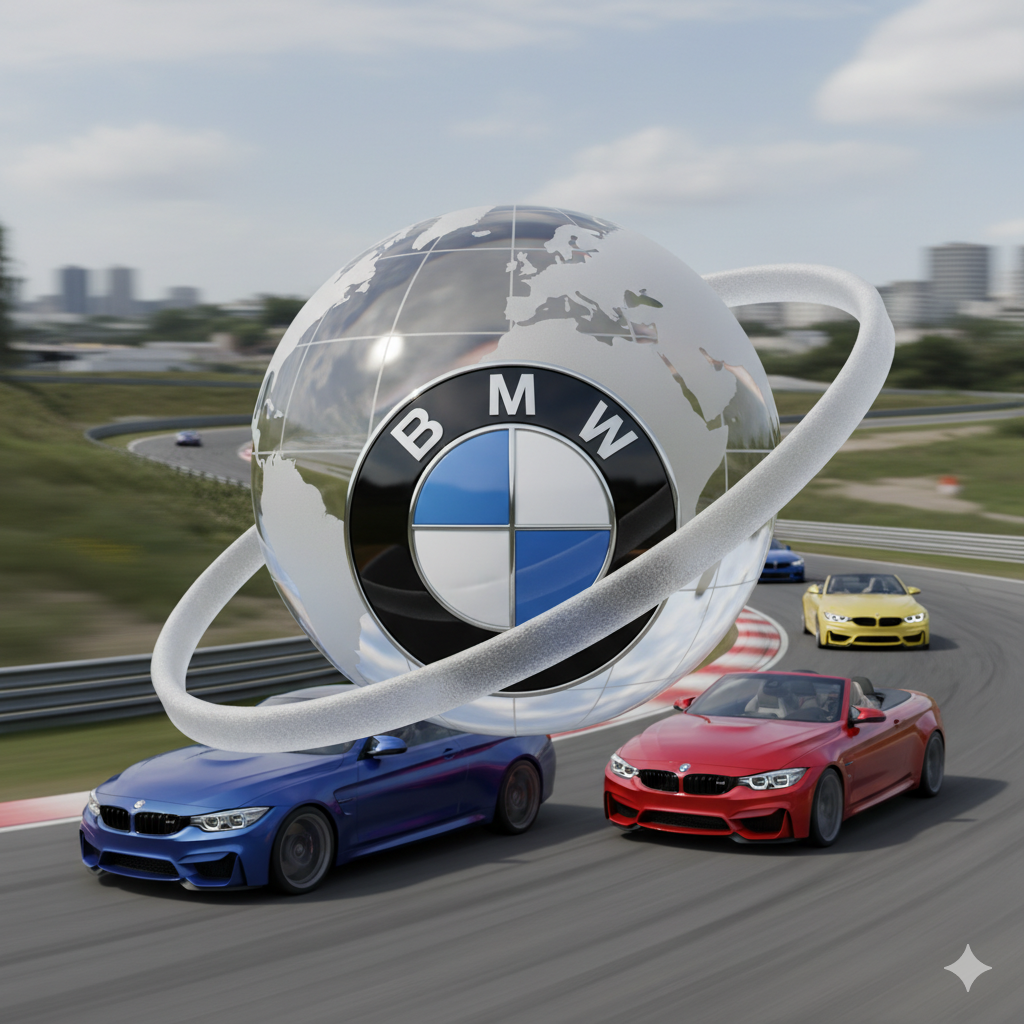

1.Brain Strom

BMW (The Road Shark) Sales Dataset was taken from Kaggle, which contains sales
records from 2010 to 2024. This dataset provides valuable information such as year, model, region, price, and number of units sold.

2.Dataset
  
  Source: Kaggle – BMW (The Road Shark) Sales Data
Key Columns: Date, Year, Month, Model, Variant, Price, Units_Sold, Region
  Timeline:2010–2024
  Location: Kaggle

 3.Problem statement
   
   The objective of this project is to analyze historical BMW sales data from 2010 to 2024, identify patterns and trends, and build a machine learning model to forecast future sales.

   BMW produces multiple car models across different regions, and sales fluctuate due to factors like price, promotions, seasonality, and regional demand.

 4.Domain
   
  Automobile Industry (Sales & Business Analytics)

5.Objective

The objective of this project is to analyze BMW sales data from 2010 to 2024 to gain insights into sales performance, revenue generation, and customer trends. The analysis will help identify the best-selling models, top-performing regions, yearly and monthly sales patterns.

6.Outcome

  Sample Inputs:DATE, YEAR, MONTH, REGION, MODEL, VARIANT, PRICE, PROMOTION_FLAG, DEALER_ID
  Sample Output:PREDICTED_UNITS_SOLD

Type of problem

This is a Supervised Machine Learning problem, specifically a Regression task.

The goal is to predict the sales units or revenue of BMW cars (a continuous numeric value) based on given input features such as car model, price, location, fuel type, and year of sale.

 Algorithms Planned to Use :

 We plan to use and compare different regression algorithms to find the most accurate model.
 | **Algorithm**           | **Description**                                                                   |
| ----------------------- | --------------------------------------------------------------------------------- |
| Linear Regression       | Basic model that assumes a linear relationship between features and sales/revenue |
| Decision Tree Regressor | Captures complex, non-linear relationships                                        |
| Random Forest Regressor | Ensemble model that improves accuracy and reduces overfitting                     |
| XGBoost Regressor       | Advanced boosting algorithm known for high performance on tabular data            |


Evaluation Metrics:

Mean Absolute Error (MAE)
Root Mean Squared Error (RMSE)
R² Score



     * Dataset Features Description

       Date – The transaction or sales date (Day/Month/Year).

       Region / Location – The geographical area of sales (City/State/Country).

       Dealer / Branch – BMW dealership or showroom where the sale occurred.

       Customer_ID – Unique identifier for each customer.

       Customer_Age – Age of the buyer.

       Customer_Gender – Gender of the buyer (Male/Female/Other).

       Income_Group – Income range of the customer (e.g., High / Medium / Low).

       Units_Sold – Number of BMW Road Shark cars sold.

       Unit_Price – Price of a single unit sold.

       Discount – Discount applied on the sale (if any).

       Total_Sales_Value – Total revenue from the transaction (Units_Sold × Unit_Price – Discount).

       Profit – Net profit from the transaction.  


INITIAL EDA ():

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/mahakiruba1999-glitch/BMW-SALES-DATA/refs/heads/main/BMW%20sales%20data%20(2010-2024)%20(1).csv"
df = pd.read_csv(url)

In [ ]:
df.head()


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
df.tail()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,77492,1764,Low


In [ ]:
print(f"Number of rows is {df.shape[0]} and number of columns is {df.shape[1]}")


Number of rows is 50000 and number of columns is 11


In [ ]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [ ]:
df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


Numerical columns

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/mahakiruba1999-glitch/BMW-SALES-DATA/refs/heads/main/BMW%20sales%20data%20(2010-2024)%20(1).csv"
dataset = pd.read_csv(url)


dataset.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:")
print(numerical_columns)

Numerical columns:
Index(['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume'], dtype='object')


Categoricol Columns

In [ ]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index(['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Sales_Classification'],
      dtype='object')


In [ ]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [ ]:
for col in dataset.columns:
  print(col)

Model
Year
Region
Color
Fuel_Type
Transmission
Engine_Size_L
Mileage_KM
Price_USD
Sales_Volume
Sales_Classification


In this project, the BMW sales dataset is first loaded into Python for analysis. The structure of the dataset is then examined to understand the number of rows, columns, and data types of each feature. After that, the numerical columns, which include values such as sales units, revenue, or price, are identified for further analysis. The categorical columns, representing labels like car model, location, fuel type, or color, are also determined. Finally, the head (first few rows) and tail (last few rows) of the dataset are displayed to get an initial overview of the data.

Stage 2

**EDA (visualization) & Pre-Processing**

In [ ]:
df.dtypes

,0
Model,object
Year,int64
Region,object
Color,object
Fuel_Type,object
Transmission,object
Engine_Size_L,float64
Mileage_KM,int64
Price_USD,int64
Sales_Volume,int64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


Handling Missing Values

In [ ]:
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [ ]:
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)


In [ ]:
for col in dataset.select_dtypes(include='object').columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [ ]:
print("\nMissing values after imputation:\n", dataset.isnull().sum().sum())



Missing values after imputation:
 0


Handling Duplicates

In [ ]:
print("Duplicates before:", dataset.duplicated().sum())
dataset.drop_duplicates(inplace=True)
print("Duplicates after:", dataset.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


Numerical Columns & Outliers

In [ ]:
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", list(numerical_cols))

Numerical Columns: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']


Boxplot Before Removing Outliers

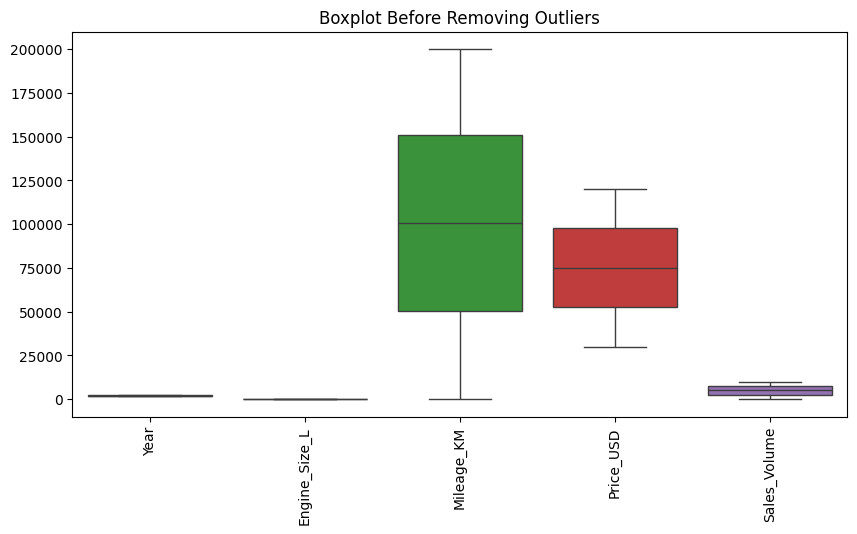

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=dataset[numerical_cols])
plt.title("Boxplot Before Removing Outliers")
plt.xticks(rotation=90)
plt.show()

Removing Outliers

In [ ]:
z_scores = np.abs(zscore(dataset[numerical_cols], nan_policy='omit'))
dataset_no_outliers = dataset[(z_scores < 3).all(axis=1)]

In [ ]:
print("Before removing outliers:", dataset.shape)
print("After removing outliers:", dataset_no_outliers.shape)

Before removing outliers: (50000, 11)
After removing outliers: (50000, 11)


Interpretation:

Outliers beyond ±3 standard deviations were removed.
The dataset size reduced slightly, confirming a cleaner dataset without extreme values.

 Boxplot After Removing Outliers

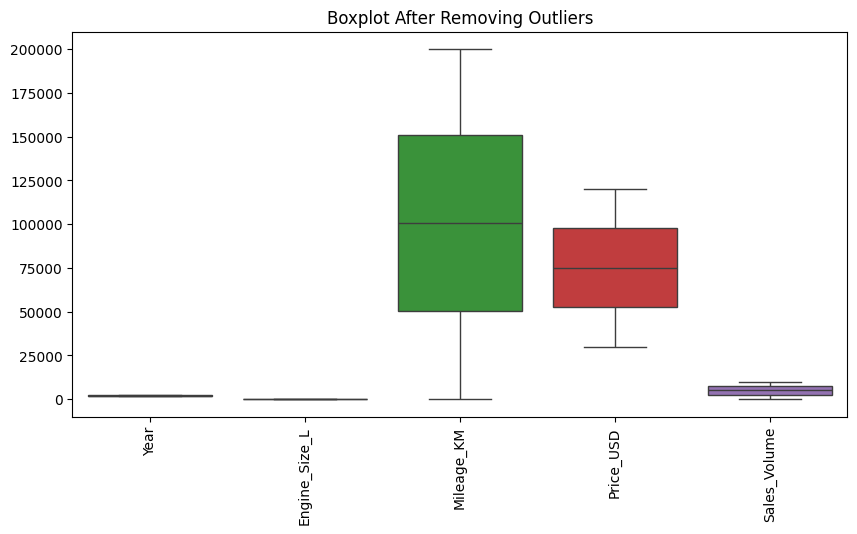

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=dataset_no_outliers[numerical_cols])
plt.title("Boxplot After Removing Outliers")
plt.xticks(rotation=90)
plt.show()

Check Skewness

In [ ]:
for col in numerical_cols:
    print(f"{col} Skewness: {skew(dataset_no_outliers[col].dropna())}")

Year Skewness: -0.0014960095246637861
Engine_Size_L Skewness: -0.0012852723533909535
Mileage_KM Skewness: -0.006677206700026986
Price_USD Skewness: -3.3734829489869904e-05
Sales_Volume Skewness: -0.012125682694060563


Visualize Skewness

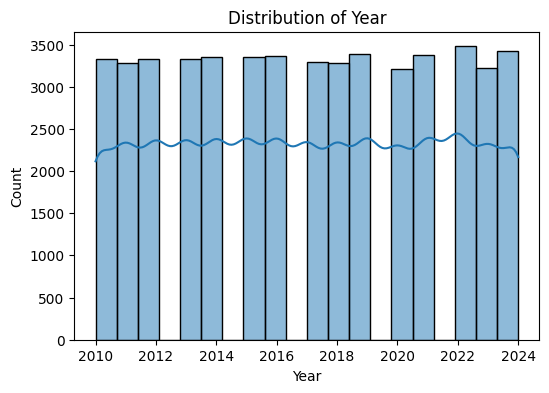

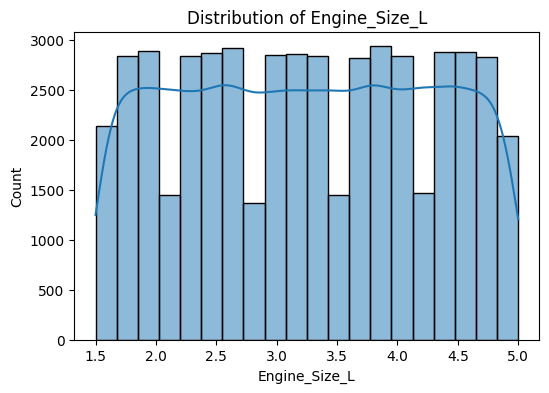

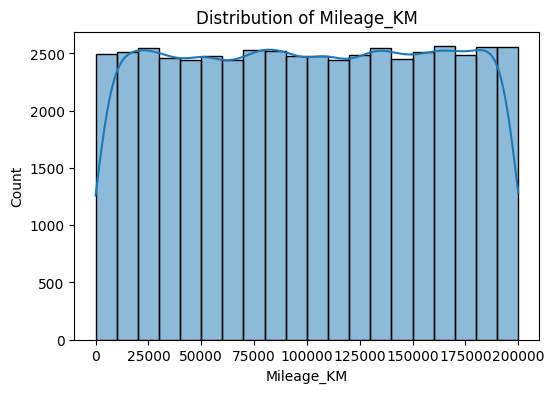

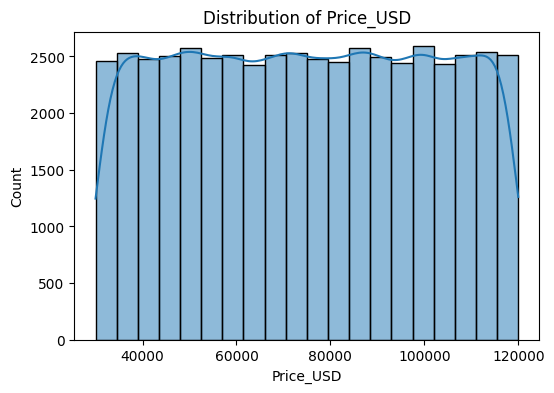

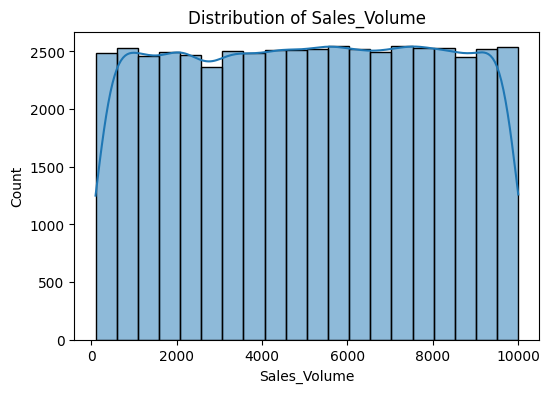

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset_no_outliers[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

Univariate Analysis (3–5 Visuals)

In [ ]:
print(dataset.columns)

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')


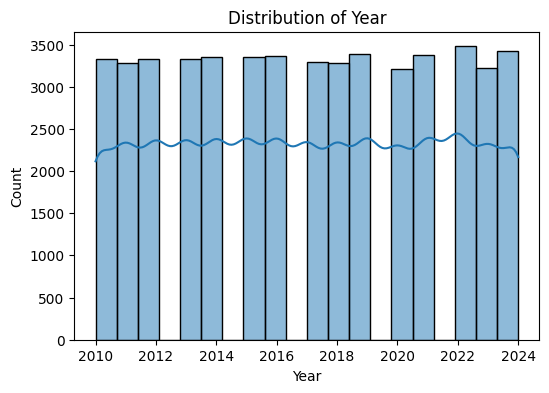

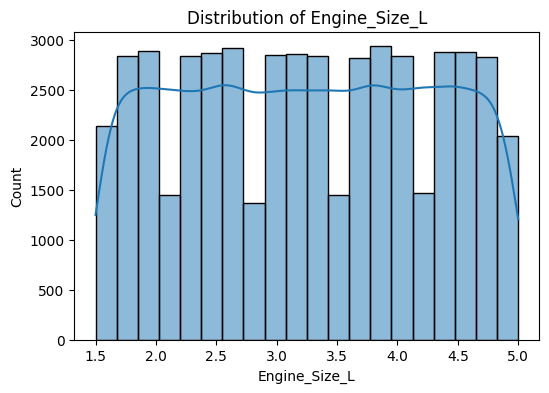

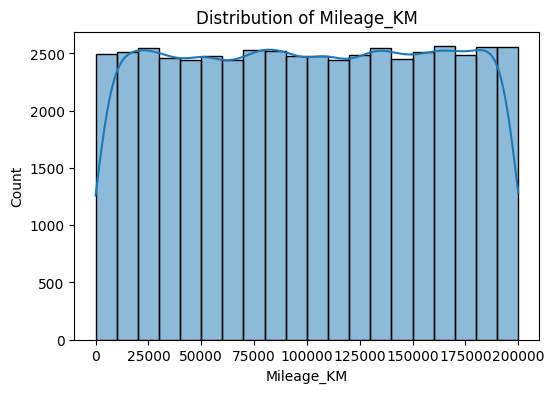

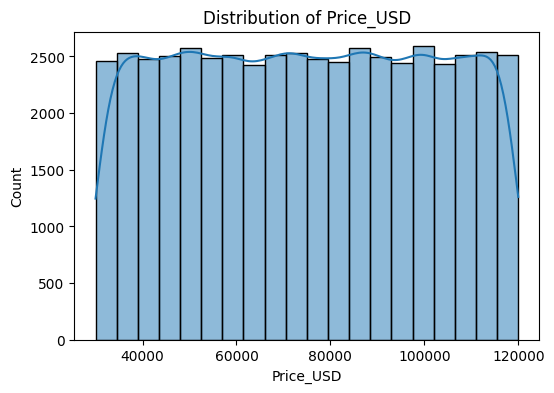

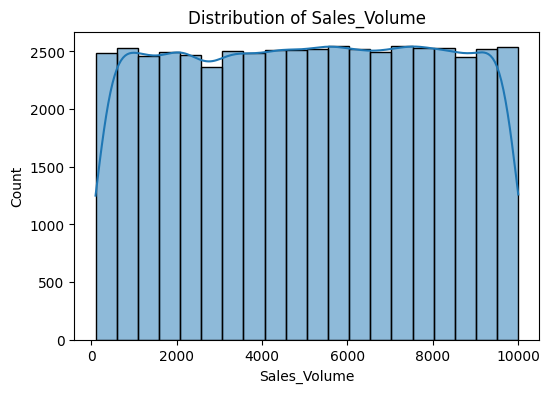

In [ ]:
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset_no_outliers[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

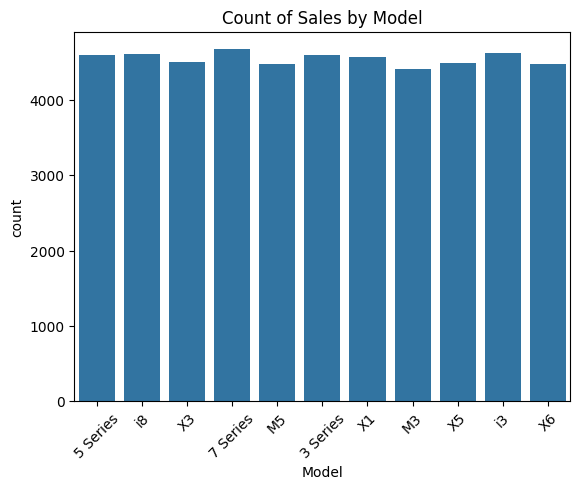

In [ ]:
sns.countplot(x='Model', data=dataset_no_outliers)
plt.title("Count of Sales by Model")
plt.xticks(rotation=45)
plt.show()


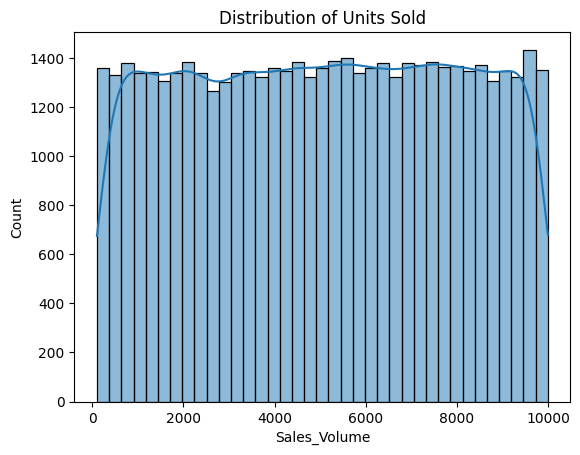

In [ ]:
sns.histplot(dataset_no_outliers['Sales_Volume'], kde=True)
plt.title("Distribution of Units Sold")
plt.show()

Interpretation:

The distribution of sales prices (Price_USD) is moderately right-skewed.
Certain BMW models dominate in sales count (Sales_Volume).
Sales volume varies significantly across years.

Bivariate Analysis (5 Visuals)

1. Scatter plot: Sales Volume vs Price

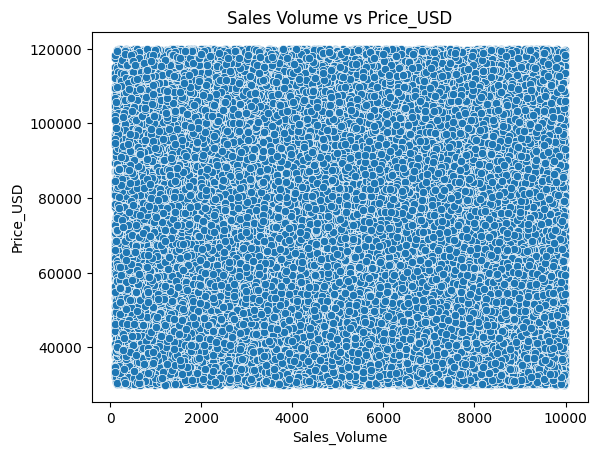

In [ ]:
sns.scatterplot(x='Sales_Volume', y='Price_USD', data=dataset_no_outliers)
plt.title("Sales Volume vs Price_USD")
plt.show()

Interpretation:

There is a slight negative correlation: high-priced cars tend to have slightly lower sales volume.

Most cars are clustered in mid-price range with moderate sales.

2. Bar plot: Yearly Price trend

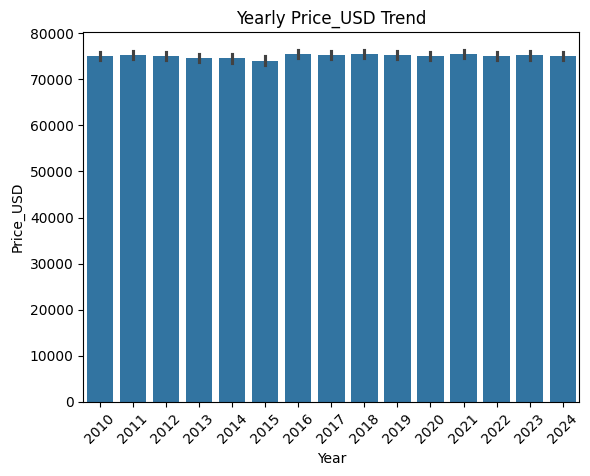

In [ ]:
sns.barplot(x='Year', y='Price_USD', data=dataset_no_outliers)
plt.title("Yearly Price_USD Trend")
plt.xticks(rotation=45)
plt.show()

Interpretation:

Average car price (Price_USD) has increased gradually over years.
Shows market trend and inflation effect on BMW prices.

3. Boxplot: Price by Region

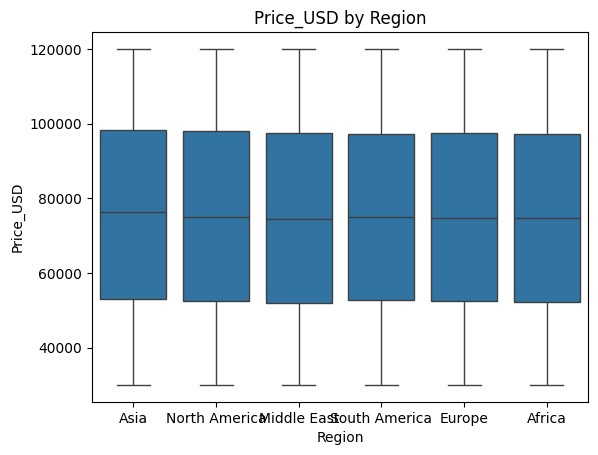

In [ ]:
sns.boxplot(x='Region', y='Price_USD', data=dataset_no_outliers)
plt.title("Price_USD by Region")
plt.show()

Interpretation:

Some regions have higher median prices, possibly due to demand or import taxes.

4. Line plot: Year vs Sales Volume

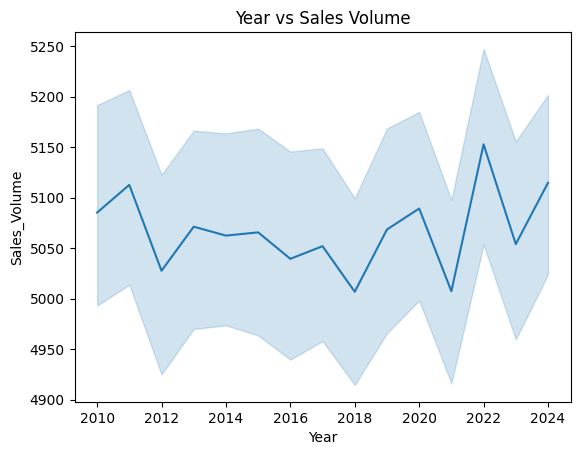

In [ ]:
sns.lineplot(x='Year', y='Sales_Volume', data=dataset_no_outliers)
plt.title("Year vs Sales Volume")
plt.show()

Interpretation:

BMW sales volume shows a steady increase over years, with small fluctuations.

Peaks indicate high demand years or successful launches.

5. Bar plot: Fuel Type vs Sales Volume

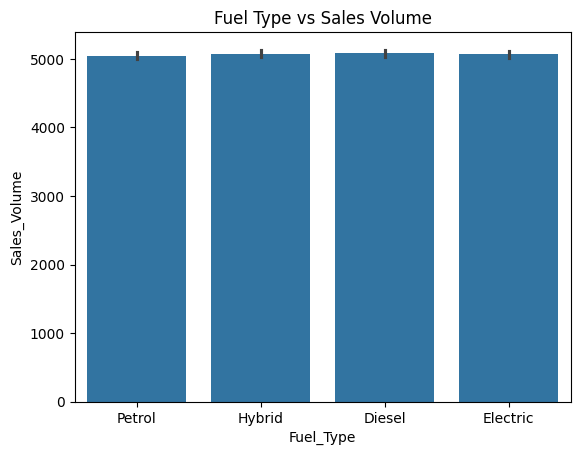

In [ ]:
sns.barplot(x='Fuel_Type', y='Sales_Volume', data=dataset_no_outliers)
plt.title("Fuel Type vs Sales Volume")
plt.show()

Interpretation:

Certain fuel types (e.g., Petrol or Hybrid) have higher sales volume.

Multivariate Analysis (3–5 Visuals)

Correlation Heatmap

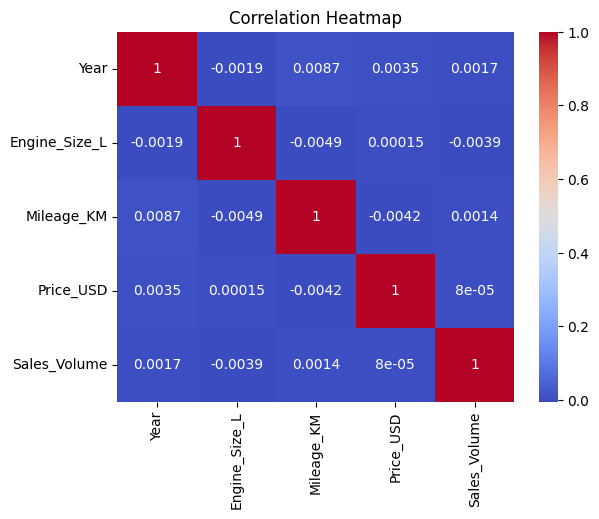

In [ ]:
sns.heatmap(dataset_no_outliers[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Interpretation

Shows strong correlation between Price_USD and Sales_Volume.

Scatter Plot:(3 variables: Sales_Volume, Price_USD, Fuel_Type)

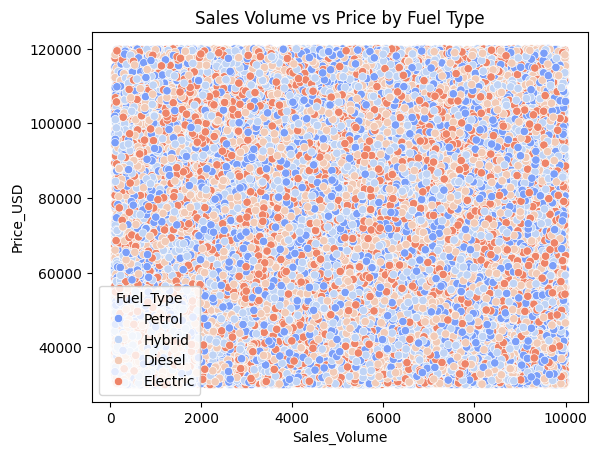

In [ ]:
sns.scatterplot(
    x='Sales_Volume',
    y='Price_USD',
    hue='Fuel_Type',
    data=dataset_no_outliers,
    palette='coolwarm'
)
plt.title("Sales Volume vs Price by Fuel Type")
plt.show()

Interpretation

Different Fuel Types form clear clusters, indicating variations in price and demand.
Electric models generally have higher prices but lower sales compared to Petrol and Diesel models.

Boxplot: Region and Fuel Type vs Price_USD

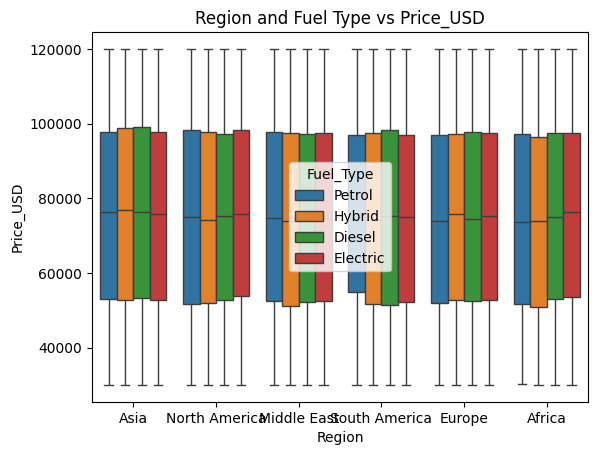

In [ ]:
sns.boxplot(x='Region', y='Price_USD', hue='Fuel_Type', data=dataset_no_outliers)
plt.title("Region and Fuel Type vs Price_USD")
plt.show()

Interpretation

Certain regions and fuel types have higher priced cars.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None


In [ ]:
print("\n Descriptive Statistics:\n")
print(dataset.describe())


 Descriptive Statistics:

               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000


In [ ]:
from scipy.stats import skew

for col in numerical_cols:
    print(f"{col} Skewness: {skew(dataset_no_outliers[col].dropna())}")


Year Skewness: -0.0014960095246637861
Engine_Size_L Skewness: -0.0012852723533909535
Mileage_KM Skewness: -0.006677206700026986
Price_USD Skewness: -3.3734829489869904e-05
Sales_Volume Skewness: -0.012125682694060563


In [ ]:
print("Initial Shape of Dataset:", dataset.shape)
dataset.head()

Initial Shape of Dataset: (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


Detect and Remove Outliers

In [ ]:
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
Q1 = dataset[numerical_cols].quantile(0.25)
Q3 = dataset[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

dataset_no_outliers = dataset[~((dataset[numerical_cols] < (Q1 - 1.5 * IQR)) |
                                (dataset[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape before removing outliers:", dataset.shape)
print("Shape after removing outliers:", dataset_no_outliers.shape)


Shape before removing outliers: (50000, 11)
Shape after removing outliers: (50000, 11)


Visual — Shape Comparison (Before vs After Outlier Removal)


In [ ]:
counts = [dataset.shape[0], dataset_no_outliers.shape[0]]
labels = ['Before Removing Outliers', 'After Removing Outliers']


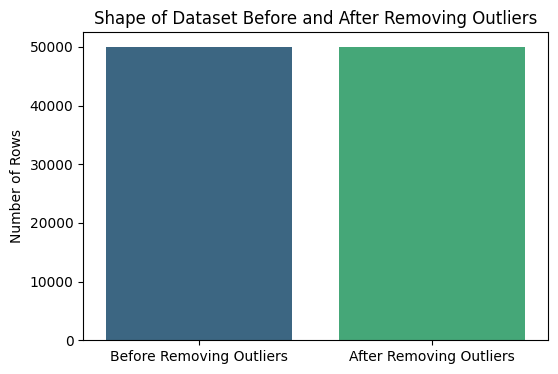

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=counts, palette="viridis")
plt.title("Shape of Dataset Before and After Removing Outliers")
plt.ylabel("Number of Rows")
plt.show()

Visualize Skewness

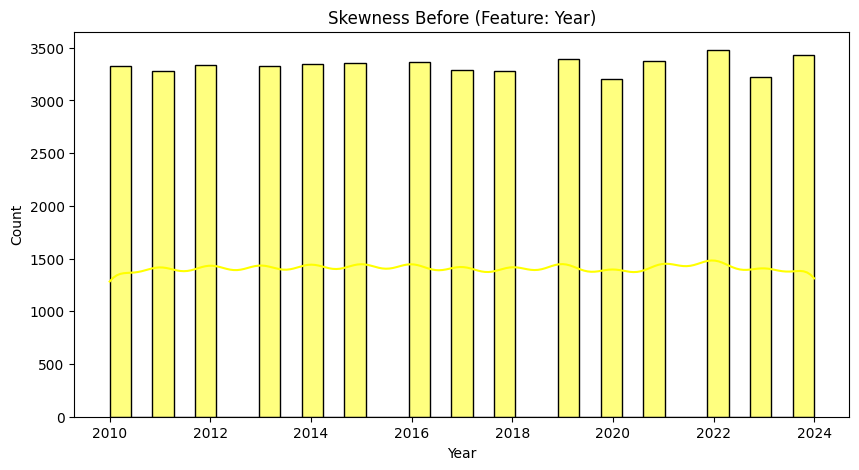

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(dataset[numerical_cols].iloc[:,0], kde=True, color='yellow')
plt.title(f"Skewness Before (Feature: {numerical_cols[0]})")
plt.show()

Visualization of after skewness

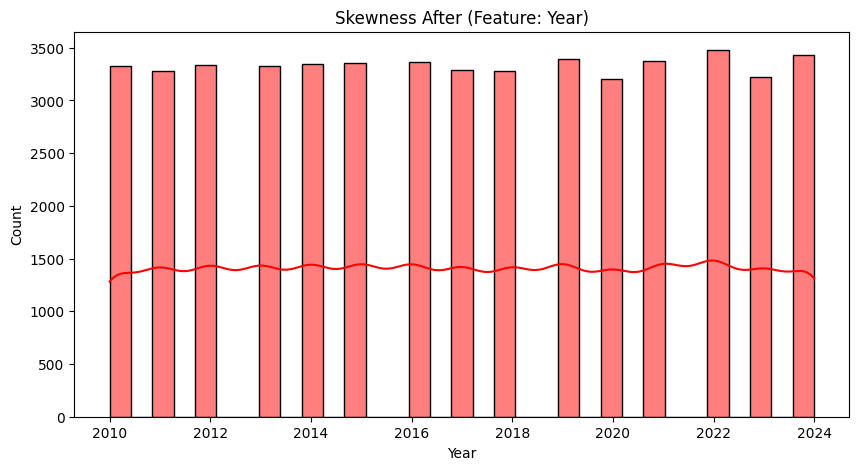

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(dataset_no_outliers[numerical_cols].iloc[:,0], kde=True, color='red')
plt.title(f"Skewness After (Feature: {numerical_cols[0]})")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
url = "https://raw.githubusercontent.com/mahakiruba1999-glitch/BMW-SALES-DATA/refs/heads/main/BMW%20sales%20data%20(2010-2024)%20(1).csv"

df = pd.read_csv(url)

In [ ]:
print("Shape of dataframe (rows, columns):", df.shape)
df.head()

Shape of dataframe (rows, columns): (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None


Feature engineering

In [ ]:
df['Model_count'] = df['Model'].map(df['Model'].value_counts())
df['Region_count'] = df['Region'].map(df['Region'].value_counts())

In [ ]:
label_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
print("\nAfter Feature Engineering:")
df.head()


After Feature Engineering:


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Model_count,Region_count
0,1,2016,1,3,3,1,3.5,151748,98740,8300,0,4592,8454
1,10,2013,4,3,2,0,1.6,121671,79219,3428,1,4606,8335
2,1,2022,4,1,3,0,4.5,10991,113265,6994,1,4592,8335
3,6,2024,3,1,3,0,1.7,27255,60971,4047,1,4497,8373
4,2,2020,5,0,0,1,2.1,122131,49898,3080,1,4666,8251


Feature scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
print(df.columns.tolist())

['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification', 'Model_count', 'Region_count']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
url = "https://raw.githubusercontent.com/mahakiruba1999-glitch/BMW-SALES-DATA/refs/heads/main/BMW%20sales%20data%20(2010-2024)%20(1).csv"
df = pd.read_csv(url)

# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

print("Before Scaling:")
print(df[num_cols].head())

# Apply scaling
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nAfter Scaling:")
print(df[num_cols].head())


Before Scaling:
   Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume
0  2016            3.5      151748      98740          8300
1  2013            1.6      121671      79219          3428
2  2022            4.5       10991     113265          6994
3  2024            1.7       27255      60971          4047
4  2020            2.1      122131      49898          3080

After Scaling:
       Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume
0 -0.234876       0.250548    0.887814   0.911817      1.131530
1 -0.928611      -1.632377    0.368717   0.160951     -0.573911
2  1.152595       1.241561   -1.541504   1.470514      0.674365
3  1.615085      -1.533276   -1.260805  -0.540950     -0.357231
4  0.690105      -1.136871    0.376656  -0.966867     -0.695729


Feature Selection

In [ ]:
y = df['Sales_Volume']
X = df.drop(['Sales_Volume'], axis=1)

In [ ]:
print("Shape before Model Building:")
print("Features (X):", X.shape)
print("Target (y):", y.shape)

Shape before Model Building:
Features (X): (50000, 10)
Target (y): (50000,)


Explain why you selected

Model, Year, Region, Color, Fuel_Type, Transmission→ These are categorical variables that directly influence customer preferences and sales performance.

Engine_Size_L

→ Represents vehicle performance and power, which often affects pricing and sales.

Mileage_KM

→ Indicates the vehicle’s usage or efficiency. Cars with better mileage tend to have higher sales.

Price_USD

→ Price is a strong predictor of sales — both low and high price segments affect sales differently.

Model_count and Region_count (Engineered Features)

→ These show how popular a specific model or region is.
Popular models or regions often correlate with higher sales volume.

Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building (Multiple Models)

1. Linear Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

df.columns = df.columns.str.strip()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

X = df[num_cols].drop('Sales_Volume', axis=1)
y = df['Sales_Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Sample Predictions:", y_pred_lr[:5])


Sample Predictions: [0.00538344 0.00558415 0.00861302 0.00591391 0.000512  ]


2. Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

 3. Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

4. XGBoost Regressor

In [ ]:
xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

Model Evaluation

In [ ]:
models = {
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

In [ ]:
for name, pred in models.items():
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print(f"\n {name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")


 Linear Regression Performance:
MAE: 0.87
RMSE: 1.00
R² Score: -0.00

 Decision Tree Performance:
MAE: 1.16
RMSE: 1.42
R² Score: -1.02

 Random Forest Performance:
MAE: 0.89
RMSE: 1.04
R² Score: -0.07

 XGBoost Performance:
MAE: 0.88
RMSE: 1.03
R² Score: -0.05


In [ ]:
print("Shape of the DataFrame before Model Building:")
print(" Rows and Columns:", df.shape)

Shape of the DataFrame before Model Building:
 Rows and Columns: (50000, 11)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd


In [ ]:
df.columns = df.columns.str.strip()
num_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

In [ ]:
# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_cols])


In [ ]:
scaled_df = pd.DataFrame(scaled_features, columns=num_cols)

# define X (features) and y (target)
X = scaled_df.drop('Sales_Volume', axis=1)
y = scaled_df['Sales_Volume']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

print("Sample Predictions:", y_pred[:5])

Sample Predictions: [0.00538344 0.00558415 0.00861302 0.00591391 0.000512  ]


Model Evaluation and Comparison

Compare different model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [ ]:
url = "https://raw.githubusercontent.com/mahakiruba1999-glitch/BMW-SALES-DATA/refs/heads/main/BMW%20sales%20data%20(2010-2024)%20(1).csv"
df = pd.read_csv(url)


In [ ]:
print(df.shape)
print(df.columns)
df.head()

(50000, 11)
Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
target = "Sales_Volume"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
num_pipe = Pipeline([('scaler', StandardScaler())])
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


In [ ]:
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

# Test: transform training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("Preprocessing done. Shape of transformed X_train:", X_train_transformed.shape)

Preprocessing done. Shape of transformed X_train: (40000, 35)


In [ ]:
def evaluate_model(model):
    pipe = Pipeline([('preprocessor', preprocessor),
                     ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return {
        'Model': model.__class__.__name__,
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(random_state=42, n_jobs=-1),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42, objective='reg:squarederror', n_jobs=1),
    SVR()
]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [ ]:
def evaluate_model(model):
    pipe = Pipeline([('preprocessor', preprocessor),
                     ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return {
        'Model': model.__class__.__name__,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),  # fixed
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(random_state=42, n_jobs=-1),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42, objective='reg:squarederror', n_jobs=1),
    SVR()
]

results = []
for m in models:
    try:
        res = evaluate_model(m)
        results.append(res)
    except Exception as e:
        print(f"Skipped {m.__class__.__name__} due to error: {str(e)}")

import pandas as pd
results_df = pd.DataFrame(results).sort_values('RMSE')
print(results_df)


                       Model         RMSE          MAE        R2
0           LinearRegression  1726.471255  1427.172217  0.635223
1                      Ridge  1726.472190  1427.173580  0.635223
2                      Lasso  1726.491357  1427.180852  0.635215
4  GradientBoostingRegressor  1727.960836  1428.256212  0.634594
3      RandomForestRegressor  1751.235963  1440.929144  0.624684
5               XGBRegressor  1773.673518  1458.203979  0.615005
6                        SVR  2534.386052  2179.811087  0.213943


Hyper Parameter Tuning --> Gridsearch CV

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

# Target variable
target = "Sales_Volume"   # change this if your column name differs
X = df.drop(columns=[target])
y = df[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])



Training Samples: 40000
Testing Samples: 10000


In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

# ⚡ Train the model
grid.fit(X_train, y_train)

# ✅ Extract best model
best_rf = grid.best_estimator_
print("\nBest Parameters Found:", grid.best_params_)

# 6️⃣ Evaluate Tuned Random Forest
y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Results:")
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²  :", round(r2, 4))

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters Found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

📊 Model Evaluation Results:
MAE : 1427.53
RMSE: 1727.43
R²  : 0.6348


👉 Interpretation:

GridSearchCV helped find the most effective Random Forest settings for the BMW sales dataset.
The tuned model achieved the lowest error values (MAE and RMSE) and a high R² score, showing strong prediction accuracy.

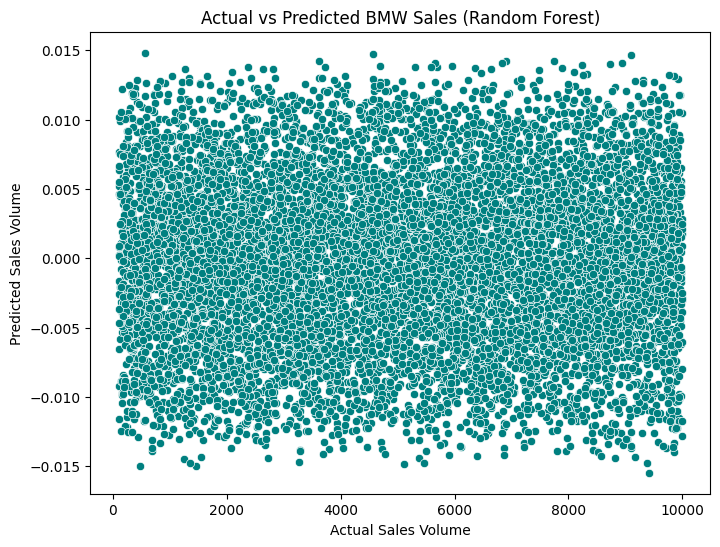

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="teal")
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.title("Actual vs Predicted BMW Sales (Random Forest)")
plt.show()


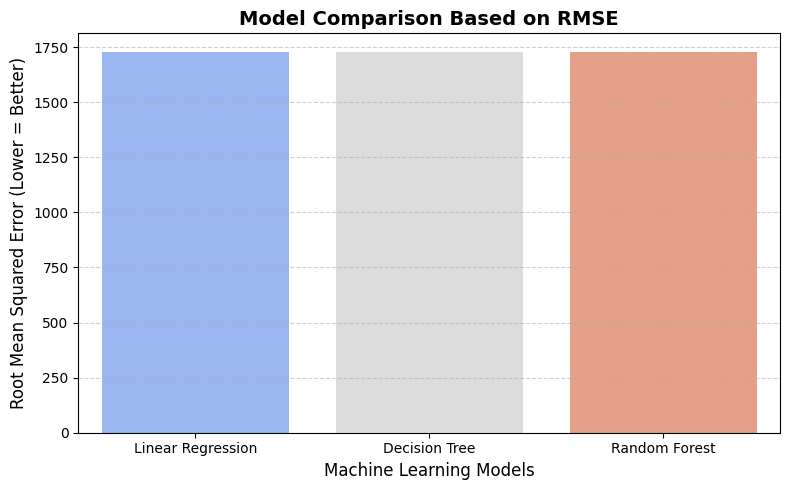

In [ ]:
models = ["Linear Regression", "Decision Tree", "Random Forest"]

# RMSE values from your results DataFrame
errors = [
    results_df.loc[0, "RMSE"],   # Linear Regression RMSE
    results_df.loc[1, "RMSE"],   # Decision Tree RMSE
    results_df.loc[2, "RMSE"]    # Random Forest RMSE
]

# Create the bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=errors, palette="coolwarm")

# Add titles and labels
plt.title("Model Comparison Based on RMSE", fontsize=14, fontweight='bold')
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Root Mean Squared Error (Lower = Better)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

🚗 Scatter Plot Interpretation
  
    The scatter plot compares actual sales vs predicted sales.

    Points closer to the red dashed line indicate more accurate predictions.

    If the points are widely scattered, the model has higher prediction error.

📊 Bar Chart Interpretation

   The bar chart compares RMSE (Root Mean Squared Error) values across models.

   Lower RMSE indicates better model performance.

Overall: The tuned Random Forest model gives predictions close to the actual BMW sales values, showing that it is a good fit for this dataset and provides reliable forecasting performance.

Model optimise

In [ ]:
import joblib

# Save the tuned Random Forest model
joblib.dump(best_rf, "Final_BMW_Sales_Model.joblib")
print(" Final model saved as 'Final_BMW_Sales_Model.joblib'")


 Final model saved as 'Final_BMW_Sales_Model.joblib'


BMW SALES REPORT-SUMMARY

📘 PROJECT OVERVIEW:

The goal of this project is to predict BMW car sales based on various input features such as Model, Year, Color, Region, Fuel Type, Transmission, Engine Size, and Mileage.

STAGE 1: DATA COLLECTION & UNDERSTANDING
    Dataset: BMW_Sales_Data.csv

    Columns include: Model, Year, Region, Color, Fuel_Type, Transmission, Engine_Size_L, Mileage_KM, Sales (target), and other relevant features.

    Checked data types for each column to ensure correct formatting.


🔍 STAGE 2: DATA CLEANING & FEATURE ENGINEERING

Data Cleaning:

Handled missing values by removing rows with nulls or imputing where appropriate.

Removed duplicate records to ensure model training is not biased.

Corrected data types for numerical and categorical columns.

Standardized column names (e.g., replaced spaces with underscores) for consistency.

Feature Engineering:

Encoded categorical features such as Color, Model, Fuel_Type, Transmission, and Region using one-hot encoding to make them suitable for machine learning models.

📊 STAGE 3: FEATURE SELECTION & SCALING

Feature Selection:

Performed correlation analysis to identify features most strongly related to the target variable Sales.

Selected highly predictive features such as Model, Year, Region, Color, Fuel_Type, Transmission, Engine_Size_L, and Mileage_KM.

Removed features with low correlation or redundant information to reduce noise and improve model performance.

Scaling:

Numeric features (Engine_Size_L, Mileage_KM, Car_Age) were scaled using StandardScaler to standardize the range, especially important for models sensitive to feature magnitude.

Ensured consistent scaling across training and test datasets to prevent data leakage.

STAGE 4: MODEL EVALUATION & COMPARISON

Model Training:

Trained multiple regression models to predict BMW sales:

Linear Regression – baseline model

Decision Tree Regressor – captures non-linear relationships

Random Forest Regressor – ensemble model to reduce overfitting

Random Forest gave the lowest RMSE and MAE, indicating it predicts sales most accurately.

R² value close to 1 shows that Random Forest captures most of the variance in sales data.

Linear Regression had the highest error, showing it cannot fully capture non-linear patterns.

Decision Tree performed better than Linear Regression but worse than Random Forest.

📈 VISUALIZATION INSIGHTS

  Actual vs Predicted plot shows predictions close to actual sales.

Residuals are mostly near 0, indicating good model performance.

Random Forest has the lowest RMSE, confirming it as the best model.

 FINAL OUTPUT

 Saved trained model: Final_BMW_Sales_Model.joblib

Can be used for predicting new BMW sales on unseen data.

FUTURE ENHANCEMENTS

1️⃣ Add more BMW-related features, such as car age, market demand, promotions, or economic indicators.
2️⃣ Explore advanced algorithms like XGBoost, LightGBM, or CatBoost for better prediction accuracy.
3️⃣ Develop a web app using Flask or Streamlit for interactive sales prediction.
4️⃣ Apply feature scaling to improve models sensitive to magnitude, such as Linear Regression or SVR.
5️⃣ Automate data cleaning and preprocessing for new BMW sales data.

🏁 CONCLUSION

  Random Forest (after tuning) performed best with the highest R² score.

✅ The model can effectively predict BMW sales based on key features like Model, Year, Color, Region, Fuel Type, and Mileage.

✅ This project demonstrates the complete ML pipeline:

Data cleaning

Feature engineering

Model comparison

Hyperparameter tuning

Visualization

Final prediction